03-02-2020
- Remove the column "Unnamed:0"
- get the categorical column names
- get the numerical columns
- Replace the missing values in numerical columns with their mean
- Draw the histogram of any one numerical column
    - Place the title of the graph as "Histogram"
    - On each bin print the count in that bin in the graph
- Draw the boxplot of any one column
- Create a subplot of (2,2).
    -(2,2,1) is a histogram
    -(2,2,2) is a boxplot
- Create a Subplot caluculate the no of graphs required based on number of numerical columns.
    - No of rows in the subplot equal to no of numerical columns
    - The plot should contains two graphs in each row. 
        - First is histogram and 
        - the second one is boxplot
    - Use figure size in plt.figure for proper graph size.
- Create Barplot for a categorical column
    - use the legend
    - xlabel
    - ylabel
- Create a subplot for categorical column barplots


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
master_df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/global_sales_data/master.csv")
master_df

,Unnamed: 0,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,...,Customer_Name,Province,Region,Customer_Segment,Order_ID_y,Ship_Mode,Ship_Date,Ship_Month,Ship_Year,Duration
0,0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,REGULAR AIR,2010-07-28,7,2010,1 days 00:00:00.000000000
1,1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,EXPRESS AIR,2010-07-27,7,2010,0 days 00:00:00.000000000
2,2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,EXPRESS AIR,2010-07-28,7,2010,1 days 00:00:00.000000000
3,3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,20513,EXPRESS AIR,2009-08-07,8,2009,31 days 00:00:00.000000000
4,4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,39682,EXPRESS AIR,2010-11-11,11,2010,61 days 00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,8394,Ord_973,Prod_8,SHP_1343,Cust_357,29.05,0.08,4,-20.90,4.32,...,THEONE PIPPENGER,BRITISH COLUMBIA,WEST,CORPORATE,40259,EXPRESS AIR,2010-10-13,10,2010,-58 days +00:00:00.000000000
8395,8395,Ord_1832,Prod_8,SHP_2526,Cust_636,57.03,0.00,7,-31.38,3.52,...,TOM PRESCOTT,NEWFOUNDLAND,ATLANTIC,SMALL BUSINESS,36230,REGULAR AIR,2009-10-06,10,2009,0 days 00:00:00.000000000
8396,8396,Ord_2010,Prod_8,SHP_2748,Cust_760,282.58,0.10,36,21.68,1.99,...,TRACY PODDAR,NOVA SCOTIA,ATLANTIC,CORPORATE,18534,EXPRESS AIR,2011-12-30,12,2011,0 days 00:00:00.000000000
8397,8397,Ord_2988,Prod_14,SHP_4132,Cust_1105,9262.35,0.09,47,2787.59,24.49,...,BECKY MARTIN,ONTARIO,ONTARIO,HOME OFFICE,23616,REGULAR AIR,2012-08-28,8,2012,0 days 00:00:00.000000000


# Remove the column "Unnamed:0"

In [11]:
master_df.drop("Unnamed: 0",axis=1,inplace=True)

In [12]:
master_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Customer_Name,Province,Region,Customer_Segment,Order_ID_y,Ship_Mode,Ship_Date,Ship_Month,Ship_Year,Duration
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,REGULAR AIR,2010-07-28,7,2010,1 days 00:00:00.000000000
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,EXPRESS AIR,2010-07-27,7,2010,0 days 00:00:00.000000000
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,EXPRESS AIR,2010-07-28,7,2010,1 days 00:00:00.000000000
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,20513,EXPRESS AIR,2009-08-07,8,2009,31 days 00:00:00.000000000
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,...,AARON BERGMAN,ALBERTA,WEST,CORPORATE,39682,EXPRESS AIR,2010-11-11,11,2010,61 days 00:00:00.000000000


# get the categorical column names

In [13]:
master_df.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Product_Category', 'Product_Sub_Category', 'Order_ID_x', 'Order_Date',
       'Order_Priority', 'Order_Month', 'Order_Year', 'Customer_Name',
       'Province', 'Region', 'Customer_Segment', 'Order_ID_y', 'Ship_Mode',
       'Ship_Date', 'Ship_Month', 'Ship_Year', 'Duration'],
      dtype='object')

# get the numerical columns

In [24]:
master_df.select_dtypes(include=np.number)

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID_x,Order_Month,Order_Year,Order_ID_y,Ship_Month,Ship_Year
0,136.81,0.01,23,-30.51,3.60,0.56,36262,7,2010,36262,7,2010
1,4701.69,0.00,26,1148.90,2.50,0.59,36262,7,2010,36262,7,2010
2,164.02,0.03,23,-47.64,6.15,0.37,36262,7,2010,36262,7,2010
3,42.27,0.01,13,4.56,0.93,0.54,20513,7,2009,20513,8,2009
4,2337.89,0.09,43,729.34,14.30,0.37,39682,9,2010,39682,11,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
8394,29.05,0.08,4,-20.90,4.32,0.64,40259,12,2010,40259,10,2010
8395,57.03,0.00,7,-31.38,3.52,0.68,36230,10,2009,36230,10,2009
8396,282.58,0.10,36,21.68,1.99,0.52,18534,12,2011,18534,12,2011
8397,9262.35,0.09,47,2787.59,24.49,0.46,23616,8,2012,23616,8,2012


In [28]:
master_df.isnull().sum()

Ord_id                   0
Prod_id                  0
Ship_id                  0
Cust_id                  0
Sales                    0
Discount                 0
Order_Quantity           0
Profit                   0
Shipping_Cost            0
Product_Base_Margin     63
Product_Category         0
Product_Sub_Category     0
Order_ID_x               0
Order_Date               0
Order_Priority           0
Order_Month              0
Order_Year               0
Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Order_ID_y               0
Ship_Mode                0
Ship_Date                0
Ship_Month               0
Ship_Year                0
Duration                 0
dtype: int64

In [29]:
master_df["Product_Base_Margin"].mean()

0.5125131957773537

In [30]:
master_df.fillna((master_df["Product_Base_Margin"].mean()),inplace=True)

In [32]:
master_df["Product_Base_Margin"].isna().sum()

0

In [33]:
master_df.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin     0
Product_Category        0
Product_Sub_Category    0
Order_ID_x              0
Order_Date              0
Order_Priority          0
Order_Month             0
Order_Year              0
Customer_Name           0
Province                0
Region                  0
Customer_Segment        0
Order_ID_y              0
Ship_Mode               0
Ship_Date               0
Ship_Month              0
Ship_Year               0
Duration                0
dtype: int64

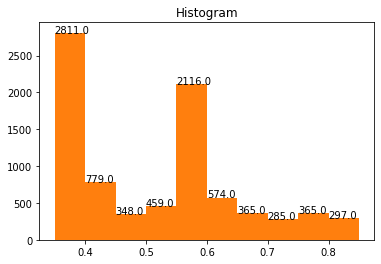

In [46]:
plt.hist(master_df["Product_Base_Margin"])
plt.title("Histogram")
out=plt.hist(master_df["Product_Base_Margin"])
values=out[0]
values2=out[1]
for i,j in zip(values2,values):
    plt.text(i,j,j)

In [41]:
list(enumerate("ml"))

[(0, 'm'), (1, 'l')]

{'whiskers': [<matplotlib.lines.Line2D at 0x296d8b7dd88>,
 'caps': [<matplotlib.lines.Line2D at 0x296d8b82e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x296d8b7dbc8>],
 'medians': [<matplotlib.lines.Line2D at 0x296d8b86dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x296d8b8bc48>],
 'means': []}

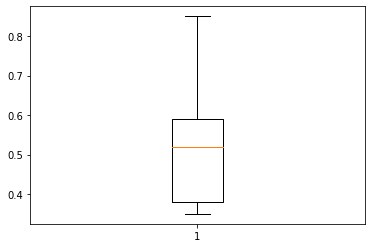

In [49]:
plt.boxplot(master_df["Product_Base_Margin"])

# Create a subplot of (2,2). -(2,2,1) is a histogram -(2,2,2) is a boxplot

Text(0.5, 1.0, 'Boxplot')

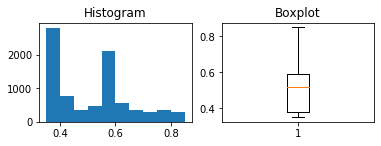

In [51]:
plt.subplot(2,2,1)
plt.hist(master_df["Product_Base_Margin"])
plt.title("Histogram")
plt.subplot(2,2,2)
plt.boxplot(master_df["Product_Base_Margin"])
plt.title("Boxplot")

# Create a Subplot caluculate the no of graphs required based on number of numerical columns.
- No of rows in the subplot equal to no of numerical columns
- The plot should contains two graphs in each row.
- First is histogram and
- the second one is boxplot